# Loan Eligibility Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Loan_Data.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
pd.crosstab(data['Credit_History'], data['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [8]:
import seaborn as sns

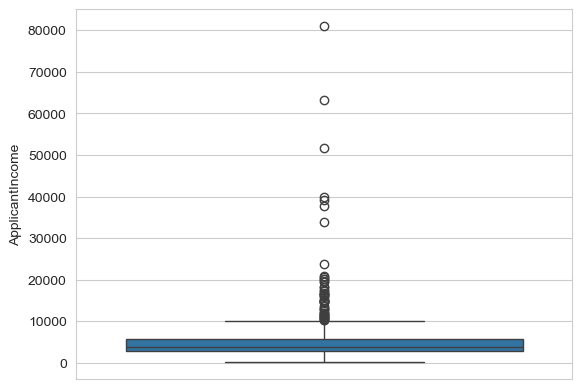

In [9]:
sns.set_style('whitegrid')
sns.boxplot(data['ApplicantIncome'])
plt.show()

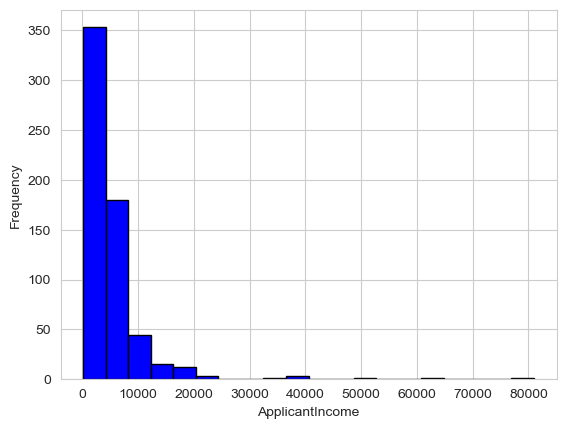

In [10]:
plt.hist(data['ApplicantIncome'], bins=20, color='blue', edgecolor='black')
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.show()

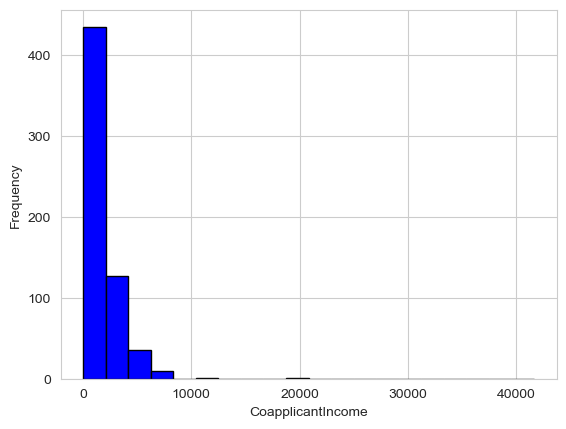

In [11]:
plt.hist(data['CoapplicantIncome'], bins=20, color='blue', edgecolor='black')
plt.xlabel('CoapplicantIncome')
plt.ylabel('Frequency')
plt.show()

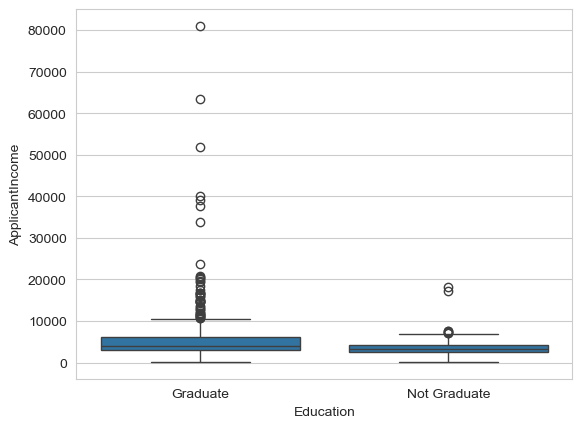

In [12]:
sns.boxplot(y='ApplicantIncome', x='Education', data=data)
plt.show()

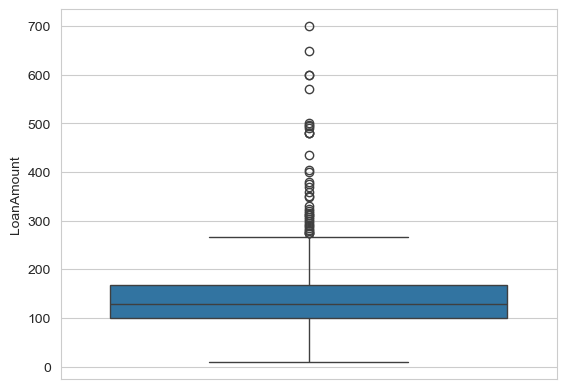

In [13]:
sns.boxplot(data['LoanAmount'])
plt.show()

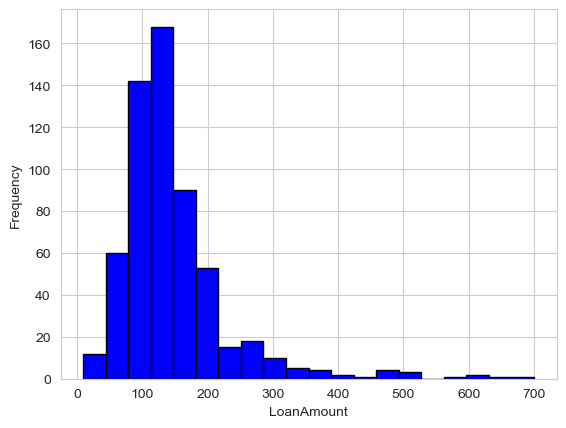

In [14]:
plt.hist(data['LoanAmount'], bins=20, color='blue',edgecolor='black')
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')
plt.show()

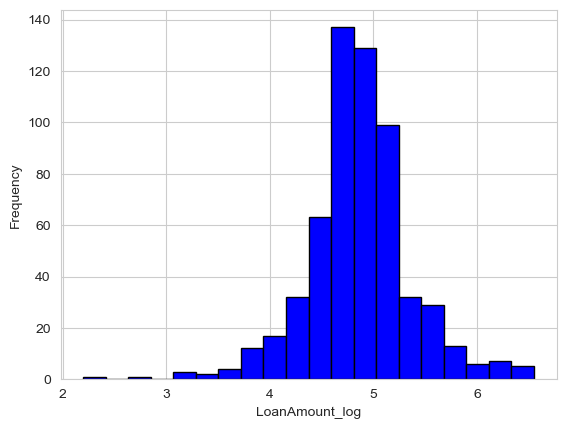

In [15]:
data['LoanAmount_log']=np.log(data['LoanAmount'])
plt.hist(data['LoanAmount_log'], bins=20, color='blue',edgecolor='black')
plt.xlabel('LoanAmount_log')
plt.ylabel('Frequency')
plt.show()

In [16]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [17]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

In [18]:
data['Married'].fillna(data['Married'].mode()[0],inplace=True)

In [19]:
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)

In [20]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

In [21]:
data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.mean())
data.LoanAmount_log = data.LoanAmount_log.fillna(data.LoanAmount_log.mean())

In [22]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)

In [23]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [24]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [25]:
data['TotalIncome']= data['ApplicantIncome'] + data['CoapplicantIncome']
data['TotalIncome_log']= np.log(data['TotalIncome'])

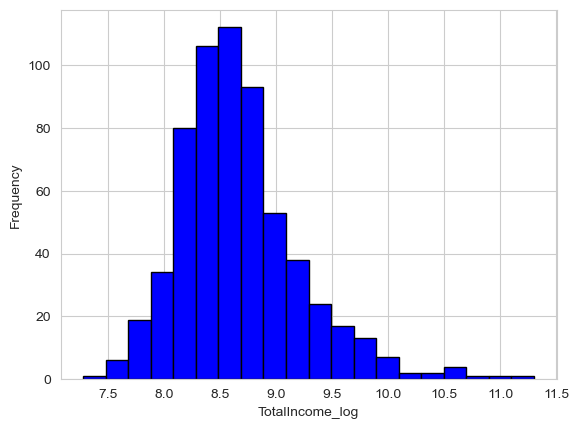

In [26]:
plt.hist(data['TotalIncome_log'], bins=20, color='blue',edgecolor='black')
plt.xlabel('TotalIncome_log')
plt.ylabel('Frequency')
plt.show()

In [27]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [28]:
X=data.iloc[:,np.r_[1:5,9:11,13:15]].values
y=data.iloc[:,12].values

In [29]:
X

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [30]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
print(X_train)

[['Male' 'Yes' '0' ... 1.0 4.875197323201151 5858.0]
 ['Male' 'No' '1' ... 1.0 5.278114659230517 11250.0]
 ['Male' 'Yes' '0' ... 0.0 5.003946305945459 5681.0]
 ...
 ['Male' 'Yes' '3+' ... 1.0 5.298317366548036 8334.0]
 ['Male' 'Yes' '0' ... 1.0 5.075173815233827 6033.0]
 ['Female' 'Yes' '0' ... 1.0 5.204006687076795 6486.0]]


In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [34]:
for i in range(0, 5):
    X_train[:,i]= labelencoder_X.fit_transform(X_train[:,i])

In [35]:
X_train[:,7]= labelencoder_X.fit_transform(X_train[:,7])

In [36]:
X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [37]:
labelencoder_y=LabelEncoder()
y_train= labelencoder_y.fit_transform(y_train)

In [38]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [39]:
for i in range(0, 5):
    X_test[:,i]= labelencoder_X.fit_transform(X_test[:,i])

In [40]:
X_test[:,7]= labelencoder_X.fit_transform(X_test[:,7])

In [42]:
X_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [43]:
labelencoder_y=LabelEncoder()
y_test= labelencoder_y.fit_transform(y_test)

In [44]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [45]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [46]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
DTClassifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [47]:
y_pred=DTClassifier.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [48]:
from sklearn import metrics
print('The accuracy of decision tree is:', metrics.accuracy_score(y_pred,y_test))

The accuracy of decision tree is: 0.7073170731707317


In [49]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(X_train, y_train)

GaussianNB()

In [50]:
y_pred=NBClassifier.predict(X_test)

In [51]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [52]:
print('The accuracy of Naive Bayes is:',metrics.accuracy_score(y_pred, y_test))

The accuracy of Naive Bayes is: 0.8292682926829268
